## Premium Lapse Prediction

In [143]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, roc_curve, precision_score, recall_score, precision_recall_curve
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

### Loading Data

In [144]:
df = pd.read_csv('train_qnU1GcL.csv')

In [145]:
test=pd.read_csv('test_LxCaReE_DvdCKVT2_7rMflxW.csv')

In [4]:
pd.isnull(df).sum()

id                                     0
perc_premium_paid_by_cash_credit       0
age_in_days                            0
Income                                 0
Count_3-6_months_late                 97
Count_6-12_months_late                97
Count_more_than_12_months_late        97
application_underwriting_score      2974
no_of_premiums_paid                    0
sourcing_channel                       0
residence_area_type                    0
target                                 0
dtype: int64

In [83]:
test.isnull().sum()

id                                     0
perc_premium_paid_by_cash_credit       0
age_in_days                            0
Income                                 0
Count_3-6_months_late                 31
Count_6-12_months_late                31
Count_more_than_12_months_late        31
application_underwriting_score      1323
no_of_premiums_paid                    0
sourcing_channel                       0
residence_area_type                    0
dtype: int64

# Filling Missing Values

In [5]:
df['Count_3-6_months_late'].value_counts()

0.0     66801
1.0      8826
2.0      2519
3.0       954
4.0       374
5.0       168
6.0        68
7.0        23
8.0        15
9.0         4
11.0        1
12.0        1
13.0        1
10.0        1
Name: Count_3-6_months_late, dtype: int64

In [146]:
df['Count_3-6_months_late'].fillna(0, inplace=True)

In [147]:
test['Count_3-6_months_late'].fillna(0, inplace=True)

In [148]:
df['Count_3-6_months_late'].value_counts()

0.0     66898
1.0      8826
2.0      2519
3.0       954
4.0       374
5.0       168
6.0        68
7.0        23
8.0        15
9.0         4
11.0        1
12.0        1
13.0        1
10.0        1
Name: Count_3-6_months_late, dtype: int64

In [149]:
df['Count_6-12_months_late'].value_counts()

0.0     75831
1.0      2680
2.0       693
3.0       317
4.0       130
5.0        46
6.0        26
7.0        11
8.0         5
10.0        4
9.0         4
14.0        2
11.0        2
13.0        2
17.0        1
12.0        1
15.0        1
Name: Count_6-12_months_late, dtype: int64

In [150]:
df['Count_6-12_months_late'].fillna(0, inplace=True)

In [151]:
test['Count_6-12_months_late'].fillna(0, inplace=True)

In [152]:
df['Count_6-12_months_late'].value_counts()

0.0     75928
1.0      2680
2.0       693
3.0       317
4.0       130
5.0        46
6.0        26
7.0        11
8.0         5
10.0        4
9.0         4
14.0        2
11.0        2
13.0        2
17.0        1
12.0        1
15.0        1
Name: Count_6-12_months_late, dtype: int64

In [153]:
df['Count_more_than_12_months_late'].value_counts()

0.0     76038
1.0      2996
2.0       498
3.0       151
4.0        48
5.0        13
6.0         6
7.0         3
8.0         2
11.0        1
Name: Count_more_than_12_months_late, dtype: int64

In [154]:
df['Count_more_than_12_months_late'].fillna(0, inplace=True)

In [155]:
test['Count_more_than_12_months_late'].fillna(0, inplace=True)

In [156]:
df['Count_more_than_12_months_late'].value_counts()

0.0     76135
1.0      2996
2.0       498
3.0       151
4.0        48
5.0        13
6.0         6
7.0         3
8.0         2
11.0        1
Name: Count_more_than_12_months_late, dtype: int64

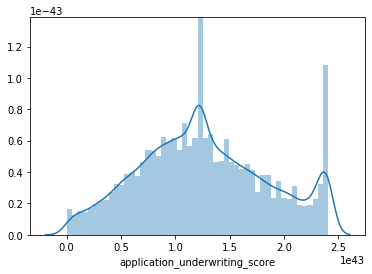

In [157]:
sns.distplot(np.exp(df['application_underwriting_score'].fillna(99.21)))

In [158]:
df['application_underwriting_score'].median()

99.21

In [159]:
test['application_underwriting_score'].median()

99.21

In [160]:
df['application_underwriting_score'].fillna(99.21, inplace=True)

In [161]:
test['application_underwriting_score'].fillna(99.21, inplace=True)

In [162]:
df.dtypes

id                                    int64
perc_premium_paid_by_cash_credit    float64
age_in_days                           int64
Income                                int64
Count_3-6_months_late               float64
Count_6-12_months_late              float64
Count_more_than_12_months_late      float64
application_underwriting_score      float64
no_of_premiums_paid                   int64
sourcing_channel                     object
residence_area_type                  object
target                                int64
dtype: object

In [163]:
df = pd.concat([df,pd.get_dummies(df['sourcing_channel'],prefix = str('source'),prefix_sep='_')],axis = 1)

In [164]:
test = pd.concat([test,pd.get_dummies(test['sourcing_channel'],prefix = str('source'),prefix_sep='_')],axis = 1)

In [165]:
df = pd.concat([df,pd.get_dummies(df['residence_area_type'],prefix = str('residence'),prefix_sep='_')],axis = 1)

In [166]:
test = pd.concat([test,pd.get_dummies(test['residence_area_type'],prefix = str('residence'),prefix_sep='_')],axis = 1)

In [167]:
df=df.drop(["sourcing_channel", "residence_area_type"],1)

In [168]:
test=test.drop(["sourcing_channel", "residence_area_type"],1)

In [169]:
df.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,target,source_A,source_B,source_C,source_D,source_E,residence_Rural,residence_Urban
0,110936,0.429,12058,355060,0.0,0.0,0.0,99.02,13,1,0,0,1,0,0,0,1
1,41492,0.010,21546,315150,0.0,0.0,0.0,99.89,21,1,1,0,0,0,0,0,1
2,31300,0.917,17531,84140,2.0,3.0,1.0,98.69,7,0,0,0,1,0,0,1,0
3,19415,0.049,15341,250510,0.0,0.0,0.0,99.57,9,1,1,0,0,0,0,0,1
4,99379,0.052,31400,198680,0.0,0.0,0.0,99.87,12,1,0,1,0,0,0,0,1


In [170]:
test.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,source_A,source_B,source_C,source_D,source_E,residence_Rural,residence_Urban
0,649,0.001,27384,51150,0.0,0.0,0.0,99.89,7,1,0,0,0,0,1,0
1,81136,0.124,23735,285140,0.0,0.0,0.0,98.93,19,1,0,0,0,0,0,1
2,70762,1.000,17170,186030,0.0,0.0,0.0,99.21,2,0,1,0,0,0,0,1
3,53935,0.198,16068,123540,0.0,0.0,0.0,99.00,11,0,1,0,0,0,1,0
4,15476,0.041,10591,200020,1.0,0.0,0.0,99.17,14,1,0,0,0,0,1,0


In [171]:
test=test.drop(["id"],1)

In [172]:
df=df.drop(["id"],1)

In [173]:
num_cols=['perc_premium_paid_by_cash_credit','age_in_days','Income','Count_3-6_months_late','Count_6-12_months_late','Count_more_than_12_months_late','application_underwriting_score','no_of_premiums_paid']

In [174]:
std = StandardScaler()
scaled = std.fit_transform(df[num_cols])
scaled = pd.DataFrame(scaled,columns=num_cols)

In [175]:
std = StandardScaler()
scaledtt = std.fit_transform(test[num_cols])
scaledtt = pd.DataFrame(scaledtt,columns=num_cols)

In [176]:
df_c = df.copy()
df = df.drop(columns = num_cols,axis = 1)
df = df.merge(scaled,left_index=True,right_index=True,how = "left")

In [177]:
test_c = test.copy()
test = test.drop(columns = num_cols,axis = 1)
test = test.merge(scaledtt,left_index=True,right_index=True,how = "left")

In [178]:
y_all = df.target
df = df.drop(['target'],axis = 1)

In [179]:
df.head()

,source_A,source_B,source_C,source_D,source_E,residence_Rural,residence_Urban,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid
0,0,0,1,0,0,0,1,0.342514,-1.303341,0.294440,-0.359383,-0.179012,-0.192199,-0.072421,0.413122
1,1,0,0,0,0,0,1,-0.908559,0.518231,0.214070,-0.359383,-0.179012,-0.192199,1.125282,1.960315
2,0,0,1,0,0,1,0,1.799611,-0.252597,-0.251132,2.534563,6.697811,3.014592,-0.526723,-0.747272
3,1,0,0,0,0,0,1,-0.792111,-0.673048,0.083900,-0.359383,-0.179012,-0.192199,0.684748,-0.360474
4,0,1,0,0,0,0,1,-0.783153,2.410071,-0.020474,-0.359383,-0.179012,-0.192199,1.097749,0.219723


In [180]:
test.head()

,source_A,source_B,source_C,source_D,source_E,residence_Rural,residence_Urban,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid
0,1,0,0,0,0,1,0,-0.938344,1.631539,-0.561222,-0.347754,-0.177465,-0.189173,1.128107,-0.745751
1,1,0,0,0,0,0,1,-0.570140,0.936021,0.304607,-0.347754,-0.177465,-0.189173,-0.188787,1.554513
2,0,1,0,0,0,0,1,2.052192,-0.315302,-0.062128,-0.347754,-0.177465,-0.189173,0.195307,-1.704195
3,0,1,0,0,0,1,0,-0.348619,-0.525349,-0.293359,-0.347754,-0.177465,-0.189173,-0.092763,0.021004
4,1,0,0,0,0,1,0,-0.818603,-1.569293,-0.010361,1.110230,-0.177465,-0.189173,0.140437,0.596070


In [181]:
test["perc_premium_paid_by_cash_credit"].min()

-0.9413375327547996

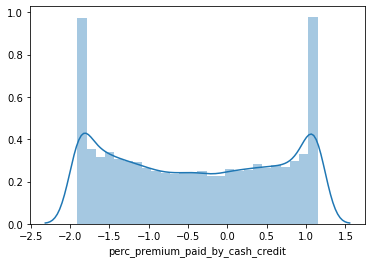

In [182]:
sns.distplot(np.log(test["perc_premium_paid_by_cash_credit"]+1.09))

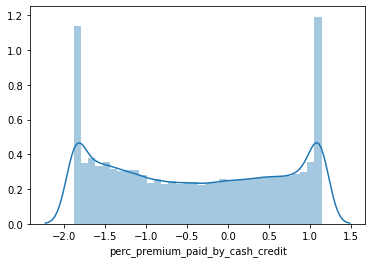

In [183]:
sns.distplot(np.log(df["perc_premium_paid_by_cash_credit"]+1.09))

In [184]:
df["perc_premium_paid_by_cash_credit"]=np.log(df["perc_premium_paid_by_cash_credit"]+1.09)

In [185]:
test["perc_premium_paid_by_cash_credit"]=np.log(test["perc_premium_paid_by_cash_credit"]+1.09)

In [216]:
xx=df["Income"]

In [267]:
xxt=test["Income"]

In [218]:
xx1=xx[xx<0.6]

In [219]:
xx2=xx[xx>0.6]

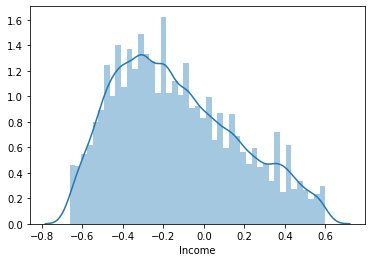

In [269]:
sns.distplot(test[test["Income"]<0.6]["Income"])

In [270]:
xxt1=xxt[xxt<0.6]

In [271]:
xxt2=xxt[xxt>0.6]

In [272]:
xxt2=xxt2/1000

In [279]:
xxxt=pd.concat([xxt1,xxt2], ignore_index=False)

In [243]:
xx2=xx2/1000

In [244]:
xxx=pd.concat([xx1,xx2], ignore_index=False)

In [245]:
xxx

0        0.294440
1        0.214070
2       -0.251132
3        0.083900
4       -0.020474
5        0.147475
6       -0.182140
7       -0.057608
8       -0.234257
9       -0.204735
10      -0.017615
11      -0.174770
12      -0.365616
13      -0.146698
14      -0.190779
15      -0.239050
16       0.405701
17       0.213990
18      -0.244306
19      -0.113249
20      -0.037773
21       0.314356
22       0.304609
23       0.032709
24       0.062815
25       0.213909
26      -0.370851
27       0.056331
28       0.374971
29      -0.254354
           ...   
78380    0.000013
78451    0.000014
78522    0.000031
78537    0.000008
78547    0.000010
78632    0.000010
78658    0.000008
78661    0.000011
78684    0.000008
78706    0.000007
78739    0.000007
78768    0.000022
78845    0.000014
78856    0.000044
78866    0.000026
78959    0.000011
78997    0.000008
79079    0.000008
79338    0.000012
79354    0.000006
79357    0.000007
79451    0.000018
79587    0.000031
79650    0.000011
79664    0

In [246]:
xxx[79852]

0.1435678085002093

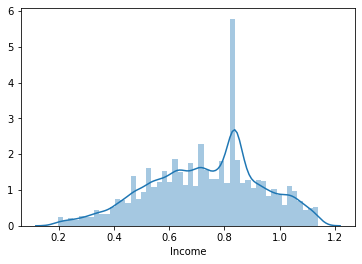

In [285]:
sns.distplot(np.sqrt((xxxt)+0.7))

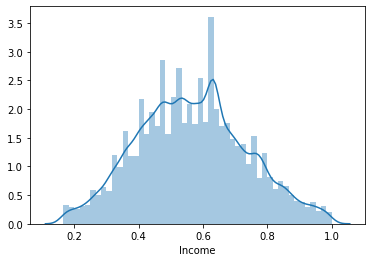

In [257]:
sns.distplot(np.sqrt((xxx)+0.4))

In [259]:
merged = pd.merge(left=df, left_index=True,right=xxx, right_index=True,how='inner')

In [287]:
mergedt = pd.merge(left=test, left_index=True,right=xxxt, right_index=True,how='inner')

In [263]:
merged[["Income_x","Income_y"]]

,Income_x,Income_y
0,0.294440,0.294440
1,0.214070,0.214070
2,-0.251132,-0.251132
3,0.083900,0.083900
4,-0.020474,-0.020474
5,0.147475,0.147475
6,-0.182140,-0.182140
7,-0.057608,-0.057608
8,-0.234257,-0.234257
9,-0.204735,-0.204735


In [289]:
mergedt[["Income_x","Income_y"]]

,Income_x,Income_y
0,-0.561222,-0.561222
1,0.304607,0.304607
2,-0.062128,-0.062128
3,-0.293359,-0.293359
4,-0.010361,-0.010361
5,0.156558,0.156558
6,0.685403,0.000685
7,-0.380908,-0.380908
8,0.581758,0.581758
9,1.136800,0.001137


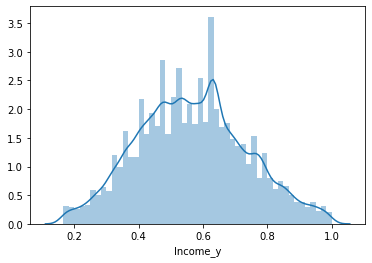

In [286]:
sns.distplot(np.sqrt(merged["Income_y"]+0.4))

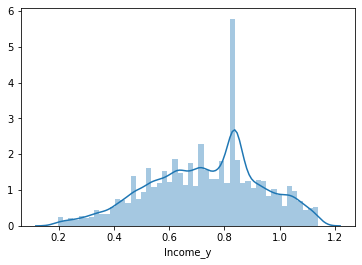

In [291]:
sns.distplot(np.sqrt(mergedt["Income_y"]+0.7))

In [301]:
df["application_underwriting_score"].min()

-9.874317374562581

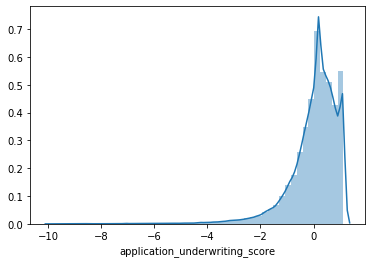

In [305]:
sns.distplot(df["application_underwriting_score"])

### Baseline Columns

In [306]:
df_baseline = df[num_cols]

In [307]:
test_dase=test[num_cols]

### Train Test Split to create a validation set

In [308]:
# Splitting the data into Train and Validation set
xtrain, xtest, ytrain, ytest = train_test_split(df_baseline,y_all,test_size=0.30, random_state=11)

In [309]:
y_all.value_counts()

1    74855
0     4998
Name: target, dtype: int64

In [310]:
ytest.value_counts()

1    22436
0     1520
Name: target, dtype: int64

In [311]:
model = LogisticRegression()
model.fit(xtrain,ytrain)
pred = model.predict_proba(xtest)[:,1]

In [312]:
from sklearn import metrics

In [313]:
metrics.roc_auc_score(ytest, pred)

0.8315613534638879

### AUC ROC Curve & Confusion Matrix 

Now, let us quickly look at the AUC-ROC curve for our logistic regression model and also the confusion matrix to see where the logistic regression model is failing here.

In [314]:
f = plt.figure(figsize=(10,10))
gs = f.add_gridspec(2,1)
sns.set(font_scale=1.5)

<Figure size 720x720 with 0 Axes>

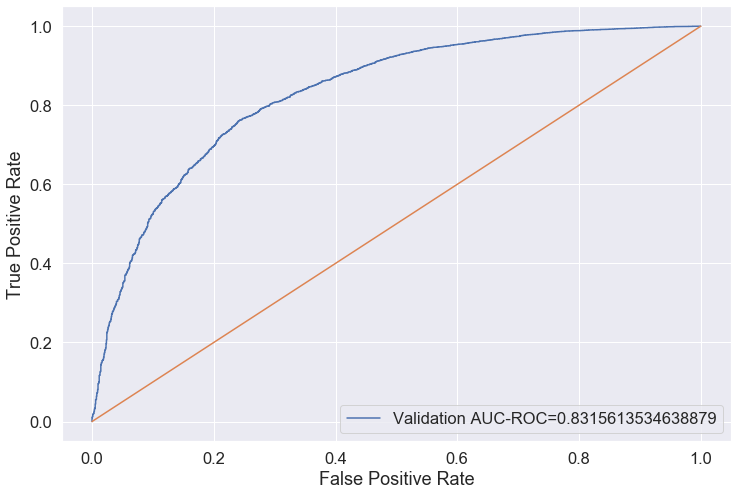

In [315]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(ytest,pred) 
auc = roc_auc_score(ytest, pred) 
plt.figure(figsize=(12,8)) 
plt.plot(fpr,tpr,label="Validation AUC-ROC="+str(auc)) 
x = np.linspace(0, 1, 1000)
plt.plot(x, x, linestyle='-')
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.legend(loc=4) 
plt.show()

In [316]:
# Confusion Matrix
pred_val = model.predict(xtest)

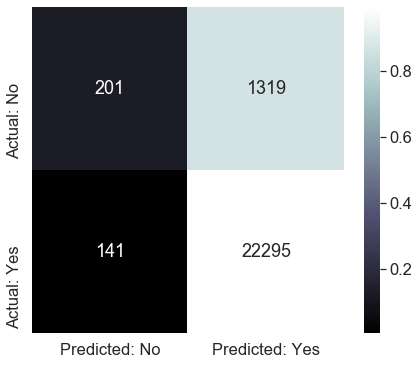

In [317]:
label_preds = pred_val

cm = confusion_matrix(ytest,label_preds)


def plot_confusion_matrix(cm, normalized=True, cmap='bone'):
    plt.figure(figsize=[7, 6])
    norm_cm = cm
    if normalized:
        norm_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        sns.heatmap(norm_cm, annot=cm, fmt='g', xticklabels=['Predicted: No','Predicted: Yes'], yticklabels=['Actual: No','Actual: Yes'], cmap=cmap)

plot_confusion_matrix(cm, ['No', 'Yes'])

In [318]:
# Recall Score
recall_score(ytest,pred_val)

0.9937154573007666

In [319]:
def cv_score(ml_model, rstate = 12, thres = 0.5, cols = df.columns):
    i = 1
    cv_scores = []
    df1 = df.copy()
    df1 = df[cols]
    
    # 5 Fold cross validation stratified on the basis of target
    kf = StratifiedKFold(n_splits=5,random_state=rstate,shuffle=True)
    for df_index,test_index in kf.split(df1,y_all):
        print('\n{} of kfold {}'.format(i,kf.n_splits))
        xtr,xvl = df1.loc[df_index],df1.loc[test_index]
        ytr,yvl = y_all.loc[df_index],y_all.loc[test_index]
            
        # Define model for fitting on the training set for each fold
        model = ml_model
        model.fit(xtr, ytr)
        pred_probs = model.predict_proba(xvl)
        pp = []
         
        # Use threshold to define the classes based on probability values
        for j in pred_probs[:,1]:
            if j>thres:
                pp.append(1)
            else:
                pp.append(0)
         
        # Calculate scores for each fold and print
        pred_val = pp
        roc_score = roc_auc_score(yvl,pred_probs[:,1])
        recall = recall_score(yvl,pred_val)
        precision = precision_score(yvl,pred_val)
        sufix = ""
        msg = ""
        msg += "ROC AUC Score: {}, Recall Score: {:.4f}, Precision Score: {:.4f} ".format(roc_score, recall,precision)
        print("{}".format(msg))
         
         # Save scores
        cv_scores.append(roc_score)
        i+=1
    return cv_scores

In [320]:
baseline_scores = cv_score(LogisticRegression(), cols = num_cols)


1 of kfold 5
ROC AUC Score: 0.8292932335849309, Recall Score: 0.9948, Precision Score: 0.9441 

2 of kfold 5
ROC AUC Score: 0.8223997728942622, Recall Score: 0.9935, Precision Score: 0.9452 

3 of kfold 5
ROC AUC Score: 0.8340283882172199, Recall Score: 0.9933, Precision Score: 0.9448 

4 of kfold 5
ROC AUC Score: 0.8197474075504936, Recall Score: 0.9938, Precision Score: 0.9446 

5 of kfold 5
ROC AUC Score: 0.8195450142547864, Recall Score: 0.9941, Precision Score: 0.9428 


Now let us try using all columns available to check if we get significant improvement.

In [321]:
all_feat_scores = cv_score(LogisticRegression())


1 of kfold 5
ROC AUC Score: 0.828829871084096, Recall Score: 0.9947, Precision Score: 0.9440 

2 of kfold 5
ROC AUC Score: 0.8226285485271525, Recall Score: 0.9935, Precision Score: 0.9450 

3 of kfold 5
ROC AUC Score: 0.8340455547391623, Recall Score: 0.9931, Precision Score: 0.9448 

4 of kfold 5
ROC AUC Score: 0.819168778022562, Recall Score: 0.9938, Precision Score: 0.9448 

5 of kfold 5
ROC AUC Score: 0.8194624388599407, Recall Score: 0.9940, Precision Score: 0.9426 


There is some improvement in both ROC AUC Scores and Precision/Recall Scores.

In [322]:
from sklearn.ensemble import RandomForestClassifier

In [323]:
rf_all_features = cv_score(RandomForestClassifier(n_estimators=500, max_depth=8))


1 of kfold 5
ROC AUC Score: 0.8482037940017367, Recall Score: 0.9980, Precision Score: 0.9408 

2 of kfold 5
ROC AUC Score: 0.8311894329036136, Recall Score: 0.9973, Precision Score: 0.9414 

3 of kfold 5
ROC AUC Score: 0.8501365974216819, Recall Score: 0.9977, Precision Score: 0.9410 

4 of kfold 5
ROC AUC Score: 0.8341566467944131, Recall Score: 0.9979, Precision Score: 0.9413 

5 of kfold 5
ROC AUC Score: 0.8392944410578503, Recall Score: 0.9973, Precision Score: 0.9408 


In [324]:
results_df = pd.DataFrame({'baseline':baseline_scores, 'all_feats': all_feat_scores, 'random_forest': rf_all_features})

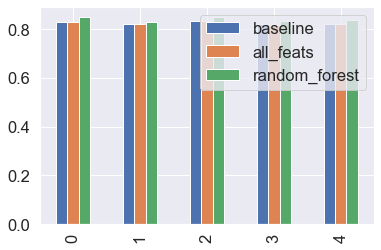

In [325]:
results_df.plot(y=["baseline", "all_feats", "random_forest"], kind="bar")

In [326]:
rn=RandomForestClassifier(n_estimators=500, max_depth=8)

In [327]:
rn.fit(xtrain, ytrain)

RandomForestClassifier(max_depth=8, n_estimators=500)

In [328]:
pred=rn.predict_proba(xtest)[:,1]

In [329]:
metrics.roc_auc_score(ytest, pred)

0.8494766399864878

In [330]:
from sklearn.tree import DecisionTreeClassifier

In [367]:
dt=DecisionTreeClassifier(class_weight='balanced', min_samples_leaf=200)

In [368]:
dt.fit(xtrain,ytrain)

DecisionTreeClassifier(class_weight='balanced', min_samples_leaf=200)

In [369]:
dty=dt.predict_proba(xtest)[:,1]

In [370]:
metrics.roc_auc_score(ytest, dty)

0.8344615913334772

In [354]:
lg = LogisticRegression(solver='liblinear', class_weight='balanced')

In [355]:
lg.fit(xtrain, ytrain)

LogisticRegression(class_weight='balanced', solver='liblinear')

In [356]:
lgy=lg.predict_proba(xtest)[:,1]

In [357]:
metrics.roc_auc_score(ytest, lgy)

0.8374973315911459

In [371]:
result=rn.predict_proba(test[num_cols])[:,1]

In [372]:
testcopy=pd.read_csv('test_LxCaReE_DvdCKVT2_7rMflxW.csv')

In [373]:
idd=testcopy["id"]

In [374]:
idd

0           649
1         81136
2         70762
3         53935
4         15476
5         64797
6         67412
7         44241
8          5069
9         16615
10        84281
11        82623
12        86475
13        68263
14       113135
15        45532
16       102161
17        84789
18        62398
19        70148
20       102487
21       100513
22        92702
23        25051
24        92920
25        25520
26        81869
27        75402
28        34053
29        21191
          ...  
34194     79950
34195     30272
34196     85914
34197     10922
34198     93046
34199     52826
34200     35994
34201      1512
34202     52077
34203     95749
34204     49946
34205     66811
34206     53438
34207     24435
34208     17848
34209     53626
34210     87268
34211     58450
34212     48188
34213     44239
34214     24582
34215     79939
34216     63759
34217     63725
34218     37116
34219     81988
34220     30326
34221     65749
34222     65686
34223     93826
Name: id, Length: 34224,

In [375]:
colls=["id", "target"]

In [376]:
result

array([0.98485447, 0.98281909, 0.8022347 , ..., 0.96350472, 0.74207637,
       0.9536211 ])

In [377]:
submission=pd.DataFrame()

In [378]:
submission

""


In [379]:
submission["id"]=idd

In [380]:
submission["target"]=result

In [381]:
submission

,id,target
0,649,0.984854
1,81136,0.982819
2,70762,0.802235
3,53935,0.975348
4,15476,0.948986
5,64797,0.980833
6,67412,0.846799
7,44241,0.825009
8,5069,0.989617
9,16615,0.988100


In [382]:
submission.to_csv("submission.csv", index=False)